In [1]:
import diverse_yeast_tools as dyt
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl

from ete3 import Tree, TreeStyle, TextFace, NodeStyle

base_dir = dyt.base_dir

In [3]:
species_set = pd.read_csv(os.path.normpath(base_dir + os.sep + 'selected_proteins/species_selection/species_selection.csv'), index_col = 0)
species_set_filt = species_set.loc[species_set['Load']=='Y']

phenotype_data = pd.read_csv(os.path.normpath(base_dir + os.sep + 'phenotype_analysis/lu_et_al_substrate_utilization.csv'))

#Note that though this dataset lists 73 different phenotypes, the paper only used 32 phenotypes.  Also Shen et al only used 46

#All but S. pombe have matches in the species data 

print('All but S. pombe have matches in the species data')
print(set(list(species_set_filt['jacobs_name'])) - set(list(phenotype_data.columns)) )

species_jacobs_names = list(set(list(phenotype_data.columns)) & set(list(species_set_filt['jacobs_name'])))

information_columns = ['Original names', 'Name in the model', 'Aerobic/Anaerobic', 'Source']

phenotype_data_subset_raw = phenotype_data.loc[:,species_jacobs_names]


All but S. pombe have matches in the species data
{'Eremothecium_gossypii', 'Torulaspora_delbrueckii', 'Kazachstania_naganishii', 'Kluyveromyces_lactis', 'Ogataea_parapolymorpha', 'Vanderwaltozyma_polyspora', 'Candida_apicola', 'Candida_tropicalis', 'Geotrichum_candidum', 'Kluyveromyces_marxianus', 'yHMPu5000034957_Hanseniaspora_osmophila', 'Zygosaccharomyces_rouxii', 'Pachysolen_tannophilus', 'Yarrowia_lipolytica', 'Tortispora_caseinolytica', 'Candida_albicans', 'Saccharomyces_cerevisiae', 'Cyberlindnera_jadinii', 'Lipomyces_starkeyi', 'Ascoidea_rubescens', 'Debaryomyces_hansenii', 'Komagataella_pastoris', 'Schizosaccharomyces_pombe', 'yHMPu5000034604_Sporopachydermia_lactativora', 'Wickerhamomyces_anomalus', 'Alloascoidea_hylecoeti', 'Lachancea_thermotolerans'}


In [ ]:
# Species with blanks in the data (see especially O. parapolymorpha).

species_blanks = {}

for spec in species_jacobs_names:
    blank_counts = Counter(phenotype_data_subset_raw.loc[:,spec])
    species_blanks[spec] = blank_counts['n']
                          
species_blanks

{'Zygosaccharomyces_rouxii': 20,
 'Komagataella_pastoris': 16,
 'Candida_tropicalis': 11,
 'Torulaspora_delbrueckii': 14,
 'Pachysolen_tannophilus': 16,
 'yHMPu5000034957_Hanseniaspora_osmophila': 18,
 'Kluyveromyces_marxianus': 12,
 'Yarrowia_lipolytica': 16,
 'Candida_albicans': 11,
 'Vanderwaltozyma_polyspora': 12,
 'Candida_apicola': 10,
 'Lipomyces_starkeyi': 17,
 'yHMPu5000034604_Sporopachydermia_lactativora': 11,
 'Lachancea_thermotolerans': 12,
 'Kazachstania_naganishii': 12,
 'Tortispora_caseinolytica': 12,
 'Eremothecium_gossypii': 17,
 'Geotrichum_candidum': 20,
 'Cyberlindnera_jadinii': 16,
 'Saccharomyces_cerevisiae': 12,
 'Alloascoidea_hylecoeti': 15,
 'Debaryomyces_hansenii': 15,
 'Ogataea_parapolymorpha': 61,
 'Wickerhamomyces_anomalus': 18,
 'Kluyveromyces_lactis': 13,
 'Ascoidea_rubescens': 15}

In [12]:
phenotype_data_subset_raw

,Ogataea_parapolymorpha,Yarrowia_lipolytica,Cyberlindnera_jadinii,Kazachstania_naganishii,yHMPu5000034957_Hanseniaspora_osmophila,Zygosaccharomyces_rouxii,Candida_tropicalis,Geotrichum_candidum,Candida_apicola,Ascoidea_rubescens,...,Candida_albicans,Debaryomyces_hansenii,Pachysolen_tannophilus,yHMPu5000034604_Sporopachydermia_lactativora,Tortispora_caseinolytica,Kluyveromyces_marxianus,Saccharomyces_cerevisiae,Lachancea_thermotolerans,Lipomyces_starkeyi,Torulaspora_delbrueckii
0,n,0,1,1,1,1,1,v,1,0,...,1,v,1,0,0,1,1,1,0,1
1,n,0,0,1,0,0,1,v,0,0,...,v,v,0,0,0,1,v,v,0,v
2,n,0,1,v,0,v,v,0,0,0,...,v,v,0,0,0,1,1,1,0,v
3,n,0,0,0,0,1,1,0,0,0,...,1,v,0,0,0,0,1,v,0,v
4,n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,v,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,n,n,n,n,0,0,n,0,0,0,...,n,0,n,n,n,n,v,n,0,n
71,n,n,n,n,0,0,n,0,0,0,...,n,0,n,n,n,n,n,n,0,n
72,n,9,7,6,6,6,9,n,9,n,...,9,9,8,9,n,6,6,6,9,6
73,n,49.9,44.7,44.5,40.1,41.2,34.7,42,45,n,...,35,36.8,37.8,46.2,46.9,41.3,39.9,46.2,47.5,43.4


In [56]:
n_present_threshold = 5  #Number of phenotypes present in each group (1 or 0) in order to use
n_missing_threshold = 4  #Maximum number of species missing data for phenotype to be included. 
conditions_to_keep = []
conditions_to_remove = {'CoQ (Main component)', 'Mol % G+C (Ave.)', 'DBB'}   # Also manually removing CBB because it is not a growth phenotype, but is Diazonium Blue B - which is a dye that distinguishes basidomycetes from ascogenous yeasts. 

n_specs = len(species_jacobs_names)
all_same = []

phenotype_lookup = {}
ind_lookup = {}
for jj, name in enumerate(phenotype_data['Original names']):
    phenotype_lookup[jj] = name
    ind_lookup[name] = jj

for ind, row in phenotype_data_subset_raw.iterrows():
    if phenotype_lookup[ind] in conditions_to_remove:
        print('Manually Removed becuase of non-binary or non-growth data: ' + phenotype_lookup[ind])
    else:
        row_counts = Counter(row)
        if (row_counts['1']+row_counts['n']+row_counts['v'])==n_specs:
            print('Uninformative Phenotype {}. All specs have same phenotype or are not present: {}'.format(phenotype_lookup[ind], 1))
            all_same.append((phenotype_lookup[ind], row_counts))
        elif (row_counts['0']+row_counts['n']+row_counts['v'])==0:
            print('Uninformative Phenotype {}. All specs have same phenotype or are not present: {}'.format(phenotype_lookup[ind], 1))
            all_same.append((phenotype_lookup[ind], row_counts))
        
        if ((row_counts['0']>=n_present_threshold) & (row_counts['1']>=n_present_threshold) ):
            if row_counts['n']>n_missing_threshold:
                print('Phenotype removed because more than {} species missing data: {}'.format(n_missing_threshold,phenotype_lookup[ind]))
            else:
                conditions_to_keep.append(phenotype_lookup[ind])
    


    #print(str(ind) + ' ' + str(row_counts['n'])
        #Filter out rows that don't vary across our species
        # with too much missing data
        # if row_counts['n'] <= n_blank_threshold:
        #     #Filter out uninformative rows - no 0's or no 1's
        #     if (row_counts['0']>0) & (row_counts['1']>0): 
        #         conditions_to_keep.append(ind)
        #     else: 
        #         print('Uninformative condition removed: ' + phenotype_lookup[ind])
        # else: 
        #     print('Condition removed because more than ' + str(n_blank_threshold) + ' species had no data: ' + phenotype_lookup[ind])

print('{} conditions to keep'.format(len(conditions_to_keep)))

conditions_to_keep    
    
            
    

Uninformative Phenotype Glucose. All specs have same phenotype or are not present: 1
Phenotype removed because more than 4 species missing data: 2-Keto-D-gluconate
Uninformative Phenotype L-Arabinitol. All specs have same phenotype or are not present: 1
Uninformative Phenotype Propane 1,2 diol. All specs have same phenotype or are not present: 1
Uninformative Phenotype Butane 2,3 diol. All specs have same phenotype or are not present: 1
Phenotype removed because more than 4 species missing data: 10% NaCl/5% glucose
Phenotype removed because more than 4 species missing data: 0.01% Cycloheximide
Phenotype removed because more than 4 species missing data: 0.1% Cycloheximide
Uninformative Phenotype Growth at 19 ℃. All specs have same phenotype or are not present: 1
Uninformative Phenotype Growth at 25℃. All specs have same phenotype or are not present: 1
Uninformative Phenotype Growth at 30℃. All specs have same phenotype or are not present: 1
Manually Removed becuase of non-binary or non-

['Glucose Fermentation',
 'Galactose Fermentation',
 'Sucrose Fermentation',
 'Raffinose Fermentation',
 'Sucrose',
 'Raffinose',
 'Galactose',
 'Trehalose',
 'Maltose',
 'Melezitose',
 'Methyl-D-glucoside',
 'Soluble Starch',
 'Cellobiose',
 'Salicin',
 'L-Sorbose',
 'D-Xylose',
 'D-Mannitol',
 'DL-Lactate',
 'Succinate',
 'Citrate',
 'D-Gluconate',
 'Growth at 37℃']

6 conditions which did not vary across our selected species were removed

I am only getting 1 with all 1 or all 0
Uninformative Phenotype Glucose removed.

I am only getting 5 with all (1 or N) or all (0 or n) 
Uninformative Phenotype Glucose removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype L-Arabinitol removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype Butane 2,3 diol removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype Growth at 19 ℃ removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype Growth at 25℃ removed. All specs have same phenotype or are not present: 1



and 7 with all (either 1 or 0) or n or v. 
Uninformative Phenotype Glucose removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype L-Arabinitol removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype Propane 1,2 diol removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype Butane 2,3 diol removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype Growth at 19 ℃ removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype Growth at 25℃ removed. All specs have same phenotype or are not present: 1
Uninformative Phenotype Growth at 30℃ removed. All specs have same phenotype or are not present: 1


[('Glucose', Counter({'1': 26})),
 ('L-Arabinitol', Counter({'n': 24, '1': 2})),
 ('Propane 1,2 diol', Counter({'n': 25, 'v': 1})),
 ('Butane 2,3 diol', Counter({'n': 25, '1': 1})),
 ('Growth at 19 ℃', Counter({'1': 25, 'n': 1})),
 ('Growth at 25℃', Counter({'1': 25, 'n': 1})),
 ('Growth at 30℃', Counter({'1': 24, 'n': 1, 'v': 1}))]


previously I removed these - 

uninformative means that the conditions had no species with either a 1 or a 0 present


      "Uninformative condition removed: Glucose\n",
      "Uninformative condition removed: Galactitol\n",
      "Condition removed because more than 5 species had no data: N-Acetyl-D-glucosamine\n",
      "Condition removed because more than 5 species had no data: Hexadecane\n",
      "Condition removed because more than 5 species had no data: Nitrite\n",
      "Condition removed because more than 5 species had no data: 2-Keto-D-gluconate\n",  *
      "Condition removed because more than 5 species had no data: 5-Keto-D-gluconate\n",
      "Condition removed because more than 5 species had no data: Saccharate\n",
      "Condition removed because more than 5 species had no data: Xylitol\n",
      "Condition removed because more than 5 species had no data: L-Arabinitol\n",
      "Condition removed because more than 5 species had no data: Arbutin\n",
      "Condition removed because more than 5 species had no data: Propane 1,2 diol\n",
      "Condition removed because more than 5 species had no data: Butane 2,3 diol\n",
      "Condition removed because more than 5 species had no data: Cadaverine\n",
      "Condition removed because more than 5 species had no data: Creatinine\n",
      "Condition removed because more than 5 species had no data: L-Lysine\n",
      "Condition removed because more than 5 species had no data: Ethylamine\n",
      "Condition removed because more than 5 species had no data: 50% Glucose\n",
      "Condition removed because more than 5 species had no data: 10% NaCl/5% glucose\n",  *
      "Uninformative condition removed: Starch formation\n",
      "Condition removed because more than 5 species had no data: Urease\n",
      "Condition removed because more than 5 species had no data: Gelatin liquefaction\n",
      "Condition removed because more than 5 species had no data: 0.01% Cycloheximide\n",  *
      "Condition removed because more than 5 species had no data: 0.1% Cycloheximide\n",  *
      "Uninformative condition removed: Growth at 19 ℃\n",
      "Uninformative condition removed: Growth at 25℃\n",
      "Uninformative condition removed: Growth at 30℃\n",
      "Condition removed because more than 5 species had no data: Growth at 35℃\n",
      "Condition removed because more than 5 species had no data: Growth at 40℃\n",
      "Condition removed because more than 5 species had no data: Growth at 45℃\n",
      "Manually Removed becuase of non-binary data: CoQ (Main component)\n",
      "Manually Removed becuase of non-binary data: Mol % G+C (Ave.)\n",
      "Uninformative condition removed: DBB\n"

In [ ]:
#Note:  this still contains 37C
phenotype_data_subset_conds = phenotype_data.loc[:,information_columns + species_jacobs_names]
phenotype_data_subset_conds.set_index('Original names', inplace=True)
phenotype_data_subset_conds.loc[conditions_to_keep,:].to_csv(base_dir + os.sep + 'phenotype_analysis/lu_et_al_substrate_utilization_subset.csv')

## Figure showing subsets for each of the selected phenotypes


In [ ]:
phenotype_data_ordered

Original names,Glucose Fermentation,Galactose Fermentation,Sucrose Fermentation,Raffinose Fermentation,Sucrose,Raffinose,Galactose,Trehalose,Maltose,Melezitose,...,Soluble Starch,Cellobiose,Salicin,L-Sorbose,D-Xylose,D-Mannitol,DL-Lactate,Succinate,Citrate,D-Gluconate
Lipomyces_starkeyi,0,0,0,0,1,1,1,1,1,1,...,v,1,v,1,1,1,0,1,1,v
Tortispora_caseinolytica,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,1,1,1,0,1
Yarrowia_lipolytica,0,0,0,0,0,0,v,0,0,0,...,0,v,v,v,0,1,1,1,1,v
Geotrichum_candidum,v,v,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,1,v,0
Starmerella_apicola,1,0,0,v,1,1,v,0,0,0,...,0,0,0,v,v,1,0,1,1,1
Alloascoidea_hylecoeti,0,0,0,0,0,0,0,1,0,1,...,1,1,1,1,1,1,0,1,0,0
Sporopachydermia_lactativora,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,v,1,v,0,0
Pachysolen_tannophilus,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,1,0,1,0,0
Komagataella_pastoris,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,v,1,1,1,v,0
Ogataea_parapolymorpha,n,n,n,n,1,0,0,n,n,1,...,n,1,n,n,1,n,n,n,n,n


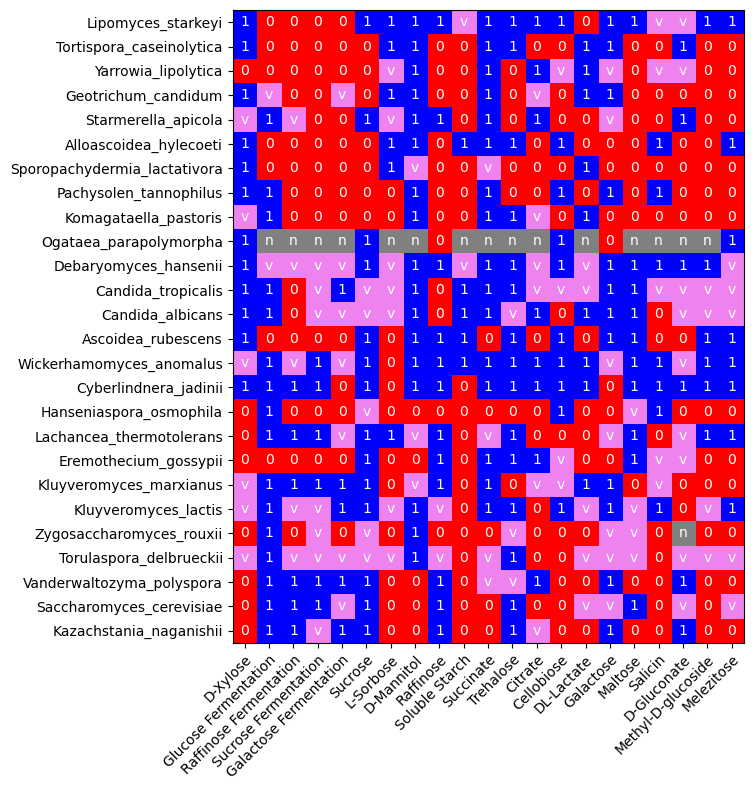

In [ ]:
#Load Time Tree
tree_fname = base_dir + os.sep + os.path.normpath('selected_proteins/species_selection/species_selection.nw')

species_set = pd.read_csv(os.path.normpath(base_dir + '/selected_proteins/species_selection/species_selection.csv'), index_col = 0)
species_set_filt = species_set.loc[species_set['Load']=='Y']

t = Tree(tree_fname, format=1)

leaf_list = t.get_leaf_names()

#Sort species into order of timetree

#Load species data
phenotype_data = pd.read_csv(base_dir + os.sep + 'phenotype_analysis/lu_et_al_substrate_utilization_subset.csv', index_col=0)

phenotype_data_filtered = phenotype_data.drop('Growth at 37℃')  # Removed heat shock condition from analysis
phenotype_data_filtered.rename(columns = dict(zip(species_set_filt['jacobs_name'], species_set_filt['Time_tree_name'])), inplace=True)

phenotype_list_pval_sort = ['D-Xylose', 'Glucose Fermentation', 'Raffinose Fermentation', 
       'Sucrose Fermentation', 'Galactose Fermentation', 'Sucrose',
       'L-Sorbose', 'D-Mannitol', 'Raffinose', 'Soluble Starch', 'Succinate',
       'Trehalose', 'Citrate', 'Cellobiose', 'DL-Lactate',
       'Galactose', 'Maltose', 'Salicin', 'D-Gluconate', 'Methyl-D-glucoside',
       'Melezitose']

phenotype_data_ordered = phenotype_data_filtered.loc[phenotype_list_pval_sort,leaf_list].T

#Visualize data

phenotype_key = {'1': (1,'blue'),
                 '0': (0,'red'), 
                 'n': (-1,'grey'),
                 'v': (0.5,'violet')
                 }

phenotype_code_lookup = {}
for text_value, phenotype_info in phenotype_key.items():
    phenotype_code_lookup[phenotype_info[0]] = text_value


phenotype_array = np.array(phenotype_data_ordered, dtype=str)
phenotype_code_array = np.zeros(phenotype_array.shape)

for jj, row in enumerate(phenotype_array):
    for kk, item in enumerate(row):
        phenotype_code_array[jj,kk] = phenotype_key[item][0]

#make this automatically?
cmap = mpl.colors.ListedColormap([phenotype_key['n'][1], phenotype_key['0'][1], phenotype_key['v'][1], phenotype_key['1'][1]])
bounds = [phenotype_key['n'][0]-1, phenotype_key['n'][0]+0.1,phenotype_key['0'][0]+0.1,phenotype_key['v'][0]+0.1,phenotype_key['1'][0]+0.1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize = (13,8))
im = ax.imshow(phenotype_code_array, cmap=cmap, norm=norm)

# Show all ticks and label them with the respective list entries

xlabels = phenotype_data_ordered.columns
ylabels = phenotype_data_ordered.index

ax.set_xticks(range(len(xlabels)), labels=xlabels,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(ylabels)), labels=ylabels)

# Loop over data dimensions and create text annotations.
for i in range(len(ylabels)):
    for j in range(len(xlabels)):
        text = ax.text(j, i, phenotype_code_lookup[phenotype_code_array[i, j]],
                       ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
fig.savefig(base_dir + os.sep + 'phenotype_analysis/phenotype_grid.svg')
plt.show()

In [7]:
phenotype_data_ordered.to_csv(base_dir + os.sep + 'phenotype_analysis/lu_et_al_substrate_utilization_subset_ordered.csv')

In [3]:
tree_fname = base_dir + os.sep + os.path.normpath('selected_proteins/species_selection/species_selection.nw')

species_set = pd.read_csv(os.path.normpath(base_dir + '/selected_proteins/species_selection/species_selection.csv'), index_col = 0)
species_set_filt = species_set.loc[species_set['Load']=='Y']

t = Tree(tree_fname, format=1)

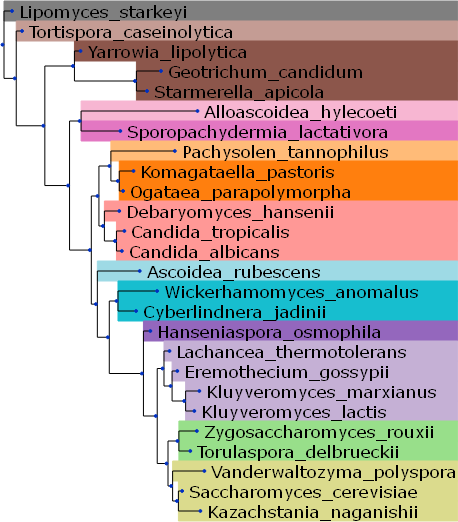

In [ ]:
#Make tree for all species with phenotype data

tree_fname = base_dir + os.sep + os.path.normpath('selected_proteins/species_selection/species_selection.nw')
t = Tree(tree_fname, format=1)

species_set = pd.read_csv(os.path.normpath(base_dir + '/selected_proteins/species_selection/species_selection.csv'), index_col = 0)
species_set_filt = species_set.loc[species_set['Load']=='Y']

clade_lookup = dict(zip(species_set_filt['Time_tree_name'], species_set_filt['New_Order']))

t.ladderize()

tab20_cmap = mpl.cm.tab20

clade_color_lookup = {'Outgroup': mpl.colors.to_hex(tab20_cmap(15)), 
                      'Lipomycetales': mpl.colors.to_hex(tab20_cmap(14)),
                      'Trigonopsidales': mpl.colors.to_hex(tab20_cmap(11)),
                      'Dipodascales': mpl.colors.to_hex(tab20_cmap(10)),
                      'Alloascoideales': mpl.colors.to_hex(tab20_cmap(13)),
                      'Sporopachydermiales': mpl.colors.to_hex(tab20_cmap(12)),
                      'Alaninales': mpl.colors.to_hex(tab20_cmap(3)),
                      'Pichiales': mpl.colors.to_hex(tab20_cmap(2)),
                      'Serinales': mpl.colors.to_hex(tab20_cmap(7)),
                      'Ascoideales': mpl.colors.to_hex(tab20_cmap(19)),
                      'Phaffomycetales': mpl.colors.to_hex(tab20_cmap(18)),
                      'Saccharomycodales': mpl.colors.to_hex(tab20_cmap(8)),
                      #'Saccharomycetaceae': colors.to_hex(tab20_cmap(9))
                       'Saccharomycetales, KLE': mpl.colors.to_hex(tab20_cmap(9)),
                       'Saccharomycetales, ZT': mpl.colors.to_hex(tab20_cmap(5)),
                       'Saccharomycetales, post WGH': mpl.colors.to_hex(tab20_cmap(17))
                     }


for node in t.get_leaves():
    name = node.name
    nstyle = NodeStyle()
    
    clade = clade_lookup[node.name]
    if clade=='Saccharomycetales':
        if name in ['Kluyveromyces_lactis','Kluyveromyces_marxianus', 'Lachancea_thermotolerans','Eremothecium_gossypii']: 
            clade = 'Saccharomycetales, KLE'
        elif name in ['Zygosaccharomyces_rouxii','Torulaspora_delbrueckii']:
            clade = 'Saccharomycetales, ZT'
        elif name in ['Saccharomyces_cerevisiae','Kazachstania_naganishii', 'Vanderwaltozyma_polyspora']: 
            clade = 'Saccharomycetales, post WGH'
    node_color = clade_color_lookup[clade]
    nstyle['bgcolor']= node_color
    
    
    node.set_style(nstyle)
    
    node_label_face = TextFace(' ' + name, fgcolor="black") # + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    node.add_face(node_label_face, column=1, position = "branch-right")

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_scale = False

fname = base_dir + os.sep + os.path.normpath('selected_proteins/species_selection/species_selection_no_pombe.svg')
t.render(fname, tree_style=ts)
t.render('%%inline', tree_style=ts)